In [1]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#import the sklearn libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [5]:
#read and load the data
df=pd.read_csv("indian_liver_patient.csv")
print (df)



     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60    Male              0.5               0.1                   500   
579   40    Male              0.6               0.1                    98   
580   52    Male              0.8               0.2                   245   
581   31    Male              1.3               0.5                   184   
582   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  

In [6]:
#get the first five data 
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
#to get the tail info of the dataset
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [8]:
# help to know if there are missing data or not
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [9]:
data.describe()


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [10]:
data.shape

(583, 11)

In [11]:
#commence data preprocessing

#check to see if there are duplicates

df_duplicate = df[data.duplicated(keep = False)] 
# keep = False gives you all rows with duplicate entries
df_duplicate

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
54,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1


In [16]:
df = df[~df.duplicated(subset = None, keep = 'first')]
# Here, keep = 'first' ensures that only the first row is taken into the final dataset.
# The '~' sign tells pandas to keep all values except the 13 duplicate values
df.shape

(570, 11)

In [17]:
#checking if there are any NULL values in our Dataset
df.isnull().values.any()

True

In [18]:
#removing null values
# display number of null values by column# display number of null values by column
print(df.isnull().sum()) 

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [19]:
# We can see that the column 'Albumin_and_Globulin_Ratio' has 4 missing values
# One way to deal with them can be to just directly remove these 4 values
print ("length before removing NaN values:%d"%len(df))
df_2 = df[pd.notnull(df['Albumin_and_Globulin_Ratio'])]
print ("length after removing NaN values:%d"%len(df_2))


length before removing NaN values:570
length after removing NaN values:566


In [20]:
new_df=df.dropna(axis = 0, how ='any')


In [21]:
new_df.isnull().values.any()

False

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    int64  
 1   Gender                      570 non-null    object 
 2   Total_Bilirubin             570 non-null    float64
 3   Direct_Bilirubin            570 non-null    float64
 4   Alkaline_Phosphotase        570 non-null    int64  
 5   Alamine_Aminotransferase    570 non-null    int64  
 6   Aspartate_Aminotransferase  570 non-null    int64  
 7   Total_Protiens              570 non-null    float64
 8   Albumin                     570 non-null    float64
 9   Albumin_and_Globulin_Ratio  566 non-null    float64
 10  Dataset                     570 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 53.4+ KB


In [25]:

#Transform our data
le = preprocessing.LabelEncoder()
le.fit(['Male','Female'])
df.loc[:,'Gender'] = le.transform(df['Gender'])

#Remove rows with missing values
df = df.dropna(how = 'any', axis = 0)

#Also transform Selector variable into usual conventions followed
df['Dataset'] = df['Dataset'].map({2:0, 1:1})

In [26]:
#Overview of data
df.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [27]:
#features characteristics to determine if feature scaling is necessary
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000
mean,44.886926,3.338869,1.505830,292.567138,80.143110,109.892226,6.494876,3.145583,0.948004,0.713781
std,16.274893,6.286728,2.841485,245.936559,182.044881,291.841897,1.087512,0.795745,0.319635,0.452393
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [28]:
#split the data into test and train samples
X_train, X_test, y_train, y_test = train_test_split(df, df['Dataset'], random_state = 0)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
#Exploratory Data Analysis

#Determining the healthy-affected split
print("Positive records:", df['Dataset'].value_counts().iloc[0])
print("Negative records:", df['Dataset'].value_counts().iloc[1])


Positive records: 404
Negative records: 162


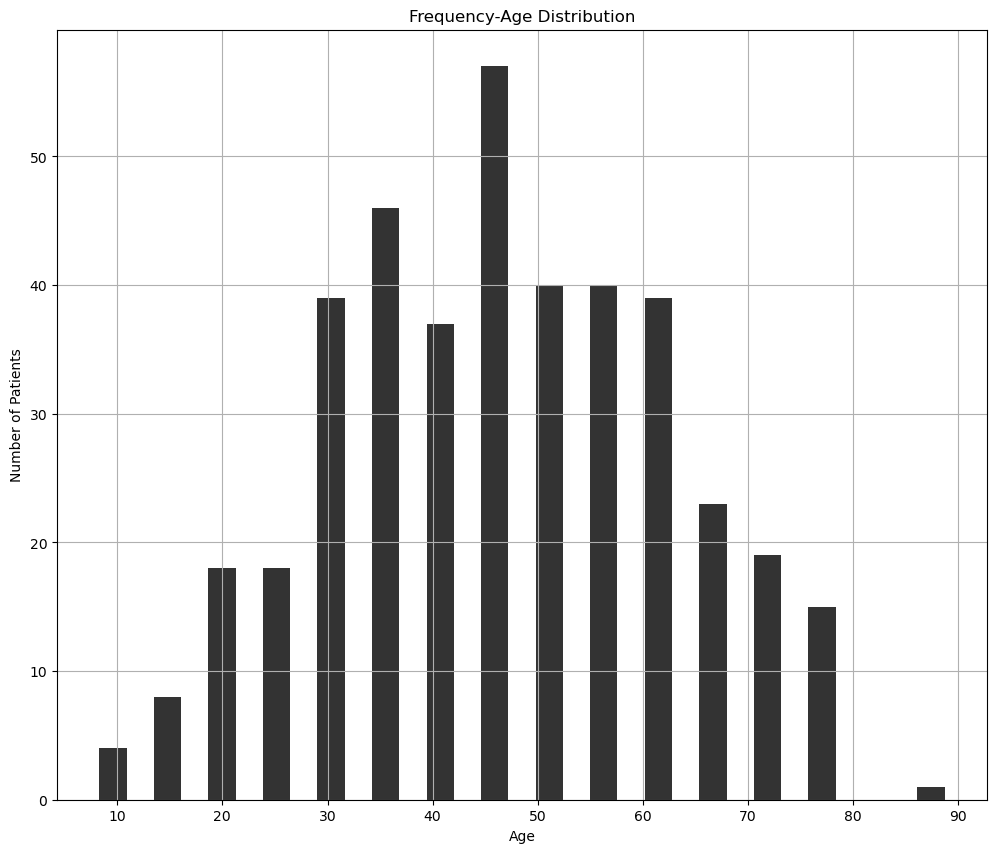

In [30]:

#Determine statistics based on age
plt.figure(figsize=(12, 10))
plt.hist(df[df['Dataset'] == 1]['Age'], bins = 16, align = 'mid', rwidth = 0.5, color = 'black', alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Frequency-Age Distribution')
plt.grid(True)
plt.savefig('fig1')
plt.show()

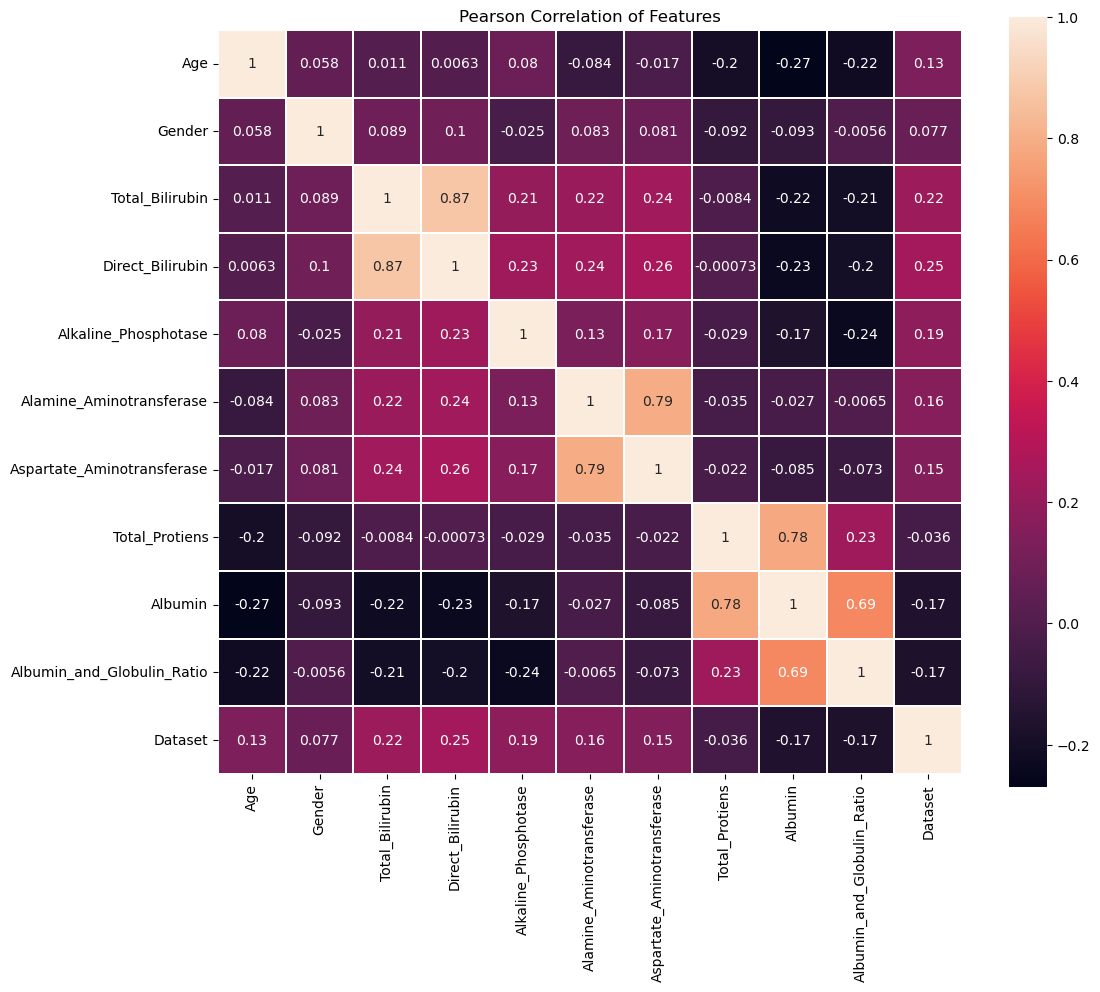

In [40]:

#correlation-matrix
plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Features')
# Draw the heatmap using seaborn
sns.heatmap(data.corr(),linewidths=0.25, vmax=1.0, square=True,annot=True)
plt.savefig('fig2')
plt.show()

In [32]:

#Using Classification Algorithms
#Let us now evaluate the performance of various classifiers on this dataset. 

#Logistic Regression: Using normal data
logreg = LogisticRegression(C = 0.1).fit(X_train, y_train)
print("Logistic Regression Classifier on unscaled test data:")
print("Accuracy:", logreg.score(X_test, y_test))
print("Precision:", precision_score(y_test, logreg.predict(X_test)))
print("Recall:", recall_score(y_test, logreg.predict(X_test)))
print("F-1 score:", f1_score(y_test, logreg.predict(X_test)))

Logistic Regression Classifier on unscaled test data:
Accuracy: 0.9859154929577465
Precision: 0.9805825242718447
Recall: 1.0
F-1 score: 0.9901960784313726


C:\Users\G MUQTHAR THOUSIF\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
#Using feature-scaled data
logreg_scaled = LogisticRegression(C = 0.1).fit(X_train_scaled, y_train)
print("Logistic Regression Classifier on scaled test data:")
print("Accuracy:", logreg_scaled.score(X_test_scaled, y_test))
print("Precision:", precision_score(y_test, logreg_scaled.predict(X_test_scaled)))
print("Recall:", recall_score(y_test, logreg_scaled.predict(X_test_scaled)))
print("F-1 score:", f1_score(y_test, logreg_scaled.predict(X_test_scaled)))


Logistic Regression Classifier on scaled test data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F-1 score: 1.0


In [34]:


#SVM Classifier with RBF kernel: Using normal data
svc_clf = SVC(C = 0.1, kernel = 'rbf').fit(X_train, y_train)
print("SVM Classifier on unscaled test data:")
print("Accuracy:", svc_clf.score(X_test, y_test))
print("Precision:", precision_score(y_test, svc_clf.predict(X_test)))
print("Recall:", recall_score(y_test, svc_clf.predict(X_test)))
print("F-1 score:", f1_score(y_test, svc_clf.predict(X_test)))


SVM Classifier on unscaled test data:
Accuracy: 0.7112676056338029
Precision: 0.7112676056338029
Recall: 1.0
F-1 score: 0.831275720164609


In [35]:
#Using scaled data
svc_clf_scaled = SVC(C = 0.1, kernel = 'rbf').fit(X_train_scaled, y_train)
print("SVM Classifier on scaled test data:")
print("Accuracy:", svc_clf_scaled.score(X_test_scaled, y_test))
print("Precision:", precision_score(y_test, svc_clf_scaled.predict(X_test_scaled)))
print("Recall:", recall_score(y_test, svc_clf_scaled.predict(X_test_scaled)))
print("F-1 score:", f1_score(y_test, svc_clf_scaled.predict(X_test_scaled)))


SVM Classifier on scaled test data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F-1 score: 1.0


In [36]:
#Random Forest Classifier: using normal data
rfc = RandomForestClassifier(n_estimators = 20)
rfc.fit(X_train, y_train)
print("SVM Classifier on unscaled test data:")
print("Accuracy:", rfc.score(X_test, y_test))
print("Precision:", precision_score(y_test, rfc.predict(X_test)))
print("Recall:", recall_score(y_test, rfc.predict(X_test)))
print("F-1 score:", f1_score(y_test, rfc.predict(X_test)))

SVM Classifier on unscaled test data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F-1 score: 1.0


In [37]:
#using scaled data
rfc_scaled = RandomForestClassifier(n_estimators = 20)
rfc_scaled.fit(X_train_scaled, y_train)
print("Random Forest Classifier on scaled test data:")
print("Accuracy:", rfc_scaled.score(X_test_scaled, y_test))
print("Precision:", precision_score(y_test, rfc_scaled.predict(X_test_scaled)))
print("Recall:", recall_score(y_test, rfc_scaled.predict(X_test_scaled)))
print("F-1 score:", f1_score(y_test, rfc_scaled.predict(X_test_scaled)))

Random Forest Classifier on scaled test data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F-1 score: 1.0
